# Import lib and read dataset

In [51]:
import pandas as pd
import numpy as np
from sklearn import datasets

FEATURE_NAMES = ['KVA','KW_PK','KW_PP_OP','KW_OP_H','MAX_KW','LoadUse_Percent','KWH_PK','KWH_PP_OP','KWH_OP_H','KWH_TOT','AMT_KW_PK','AMT_KWH_PK','AMT_KWH_OP','AMT_KWH_TOT',	'AMT_FT','AMT_BILL','AMT_VAT','AMT_INVOICE']
file_excel_path = "C:\\Users\\tahoa\\Machine Learning\\Dic_Tree_Data_PCR_Latest.xlsx"
df = pd.read_excel(file_excel_path)
print(df.head)

<bound method NDFrame.head of         KVA RATEBILL  KW_PK  KW_PP_OP  KW_OP_H  MAX_KW  LoadUse_Percent  \
0       160     3224  44.63     39.58    45.49   45.49         0.284313   
1        50     2114   7.26      4.76     7.50    7.50         0.150000   
2        50     2114   0.00      0.00     0.00    0.00         0.000000   
3        50     2114   0.00      0.00     0.00    0.00         0.000000   
4       400     3224  12.00     11.20    13.60   13.60         0.034000   
...     ...      ...    ...       ...      ...     ...              ...   
462645  500     2114   2.70      0.00     0.00    2.70         0.005400   
462646  100     2114  19.44      3.48     2.88   19.44         0.194400   
462647   50     2114   0.00      0.00     0.00    0.00         0.000000   
462648  160     3224  33.25      4.49    31.21   33.25         0.207813   
462649   50     2114   0.00      0.00     0.00    0.00         0.000000   

         KWH_PK  KWH_PP_OP  KWH_OP_H   KWH_TOT  AMT_KW_PK  AMT_KWH_PK

In [52]:
print(FEATURE_NAMES)

['KVA', 'KW_PK', 'KW_PP_OP', 'KW_OP_H', 'MAX_KW', 'LoadUse_Percent', 'KWH_PK', 'KWH_PP_OP', 'KWH_OP_H', 'KWH_TOT', 'AMT_KW_PK', 'AMT_KWH_PK', 'AMT_KWH_OP', 'AMT_KWH_TOT', 'AMT_FT', 'AMT_BILL', 'AMT_VAT', 'AMT_INVOICE']


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462650 entries, 0 to 462649
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   KVA              462650 non-null  int64  
 1   RATEBILL         462650 non-null  object 
 2   KW_PK            462650 non-null  float64
 3   KW_PP_OP         462650 non-null  float64
 4   KW_OP_H          462650 non-null  float64
 5   MAX_KW           462650 non-null  float64
 6   LoadUse_Percent  462650 non-null  float64
 7   KWH_PK           462650 non-null  float64
 8   KWH_PP_OP        462650 non-null  float64
 9   KWH_OP_H         462650 non-null  float64
 10  KWH_TOT          462650 non-null  float64
 11  AMT_KW_PK        462650 non-null  float64
 12  AMT_KWH_PK       462650 non-null  float64
 13  AMT_KWH_OP       462650 non-null  float64
 14  AMT_KWH_TOT      462650 non-null  float64
 15  AMT_FT           462650 non-null  float64
 16  AMT_BILL         462650 non-null  floa

# set x and y

In [54]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [55]:
X = pd.DataFrame(df, columns = FEATURE_NAMES)
y = df.JobNO
train_x,test_x,train_y,test_y = train_test_split(X,y,train_size=0.9,random_state=1)

In [56]:
print(train_x.count())
print(test_x.count())

KVA                416385
KW_PK              416385
KW_PP_OP           416385
KW_OP_H            416385
MAX_KW             416385
LoadUse_Percent    416385
KWH_PK             416385
KWH_PP_OP          416385
KWH_OP_H           416385
KWH_TOT            416385
AMT_KW_PK          416385
AMT_KWH_PK         416385
AMT_KWH_OP         416385
AMT_KWH_TOT        416385
AMT_FT             416385
AMT_BILL           416385
AMT_VAT            416385
AMT_INVOICE        416385
dtype: int64
KVA                46265
KW_PK              46265
KW_PP_OP           46265
KW_OP_H            46265
MAX_KW             46265
LoadUse_Percent    46265
KWH_PK             46265
KWH_PP_OP          46265
KWH_OP_H           46265
KWH_TOT            46265
AMT_KW_PK          46265
AMT_KWH_PK         46265
AMT_KWH_OP         46265
AMT_KWH_TOT        46265
AMT_FT             46265
AMT_BILL           46265
AMT_VAT            46265
AMT_INVOICE        46265
dtype: int64


In [57]:
Treemodel = tree.DecisionTreeClassifier()
KNNmodel = KNeighborsClassifier(n_neighbors=5)
Treemodel = Treemodel.fit(train_x,train_y)
KNNmodel = KNNmodel.fit(train_x,train_y)

In [66]:
TreeScore =Treemodel.score(test_x,test_y)
KnnScore = KNNmodel.score(test_x,test_y)
print(TreeScore,KnnScore)

0.91702150653842 0.9273532908245974


# For Test Model

In [62]:
NewData = [[160,0,0,0,0,0.00,6860,0,0,6860,0,0,0,26812.99,-2283.69,24841.54,1738.91,26580.45]]
testPredict = Treemodel.predict(NewData)
print(testPredict)

[7]


C:\Users\tahoa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# For Test Score

In [67]:
treeScore = model.score(NewData,[7])
print(treeScore)

1.0


C:\Users\tahoa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# 

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

# For export file image

In [41]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'PCR_DicisionTree.dot', feature_names = FEATURE_NAMES)

In [42]:
! dot -Tpng PCR_DicisionTree.dot -o PCR_DicisionTree.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0166961 to fit


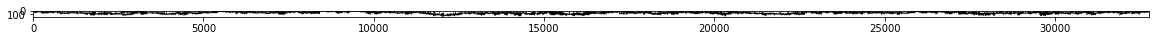

In [43]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('PCR_DicisionTree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)